In [1]:
#Load the data
library(tidyverse)

players <- read_csv("players.csv")
summary(players)
sessions <- read_csv("sessions.csv")
summary(sessions)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

**Data Description**


**Players:**
- There are a total of 196 observations which include 7 different variables
- Summary statistics:

|  Variable  |  Minimum   | 1st Quartile | 3rd Quartile |   Median   |    Mean    |  Maximum   |    NA's    |
| ---------- | ---------- |  ----------  |  ----------  | ---------- | ---------- | ---------- | ---------- |
| played_hours | 0.00 | 0.00 | 0.60 | 0.10 | 5.85 | 223.10 | 0 |
| Age | 9.00 | 17.00 | 22.75 | 19.00 | 21.14 | 58.00 | 2 |

|  Variable  |    Type    |  Meaning   |
| ---------- | ---------- | ---------- |
| experience | Character  | Gaming experience <br> (beginner, amateur, pro, veteran) |
|  subscribe |   Logical  | Tells us if player is subscribed to newsletter|
| hashedEmail | Character | Anonymous unique user id used to link players to their sessions |
| played_hours | Numeric | Total number of hours the player has spent on the server |
| name | Character | First name of player |
| gender | Character | Gender of player |
| Age | Numeric | Age of player |

Issues:
- Age variable has two missing values
- Most players recorded almost no playtime while a few accumulated very high totals
     - This may influence model performance
- Information is self reported is self-reported so tthere is a possibility that players maay provide inaccurate ages or experience levels
- There are more true than false for the response variable subscribe
- hashedEmail is anonymized which can make it harder to verfiy duplicate players
      

**Question**

Broad Question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific: Can players experience and total hours played predict whether a player subscribes to the newsletter using the players dataset?

- players dataset contains the response variable subscribe and the explanatory variables played_hours and experience
     - goal is to predict whether a player subscribes to the newsletter based on the number of hours played and their skill level
- Subscribe is categorical
    - k-nearest neighbors (k-NN) classification is appropriate

Plan:
- tidy the players dataset by making sure that experience is stored as a categorical variable and that played_hours is numeric
- check for missing values and remove them
- don't need both datasets since all the variables needed are in the players dataset
- apply the k-NN classification to answer our question after wrangling the data

**Exploratory Data Analysis and Visualization**

| Variable |   Mean  |
| -------- | --------|
|   Age    |   21.14 |
| played_hours | 5.85 |



In [2]:
# Load the data and tidy
library(tidyverse)
players <- read_csv("players.csv") |>
            mutate(experience = as.factor(experience),
                   subscribe = as.factor(subscribe))
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [3]:
# Mean value for Age and played_hours
mean_players <- players |>
                summarize(played_hours_mean = round(mean(played_hours, na.rm = TRUE), 2),
                          Age_mean = round(mean(Age, na.rm = TRUE), 2))
mean_players

played_hours_mean,Age_mean
<dbl>,<dbl>
5.85,21.14


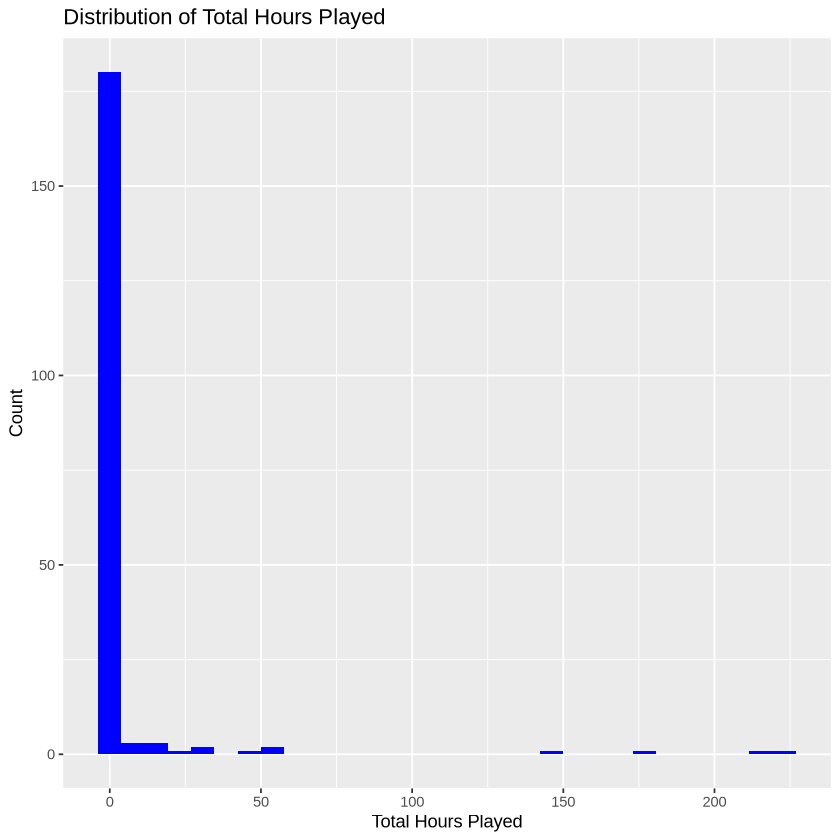

In [4]:
# Distribution of Total Hours Played

total_hours_played_plot <- players |>
                        ggplot(aes(x = played_hours)) +
                        geom_histogram(bins = 30, fill = "blue") +
                        labs(x = "Total Hours Played", y = "Count") +
                        ggtitle("Distribution of Total Hours Played")
total_hours_played_plot

- Majority of players have very low playtimes
    - very few players recording extremely high values
        - can influence the behaviour of k-NN so need to take extra steps to ensure that all the weight is distributed evenly

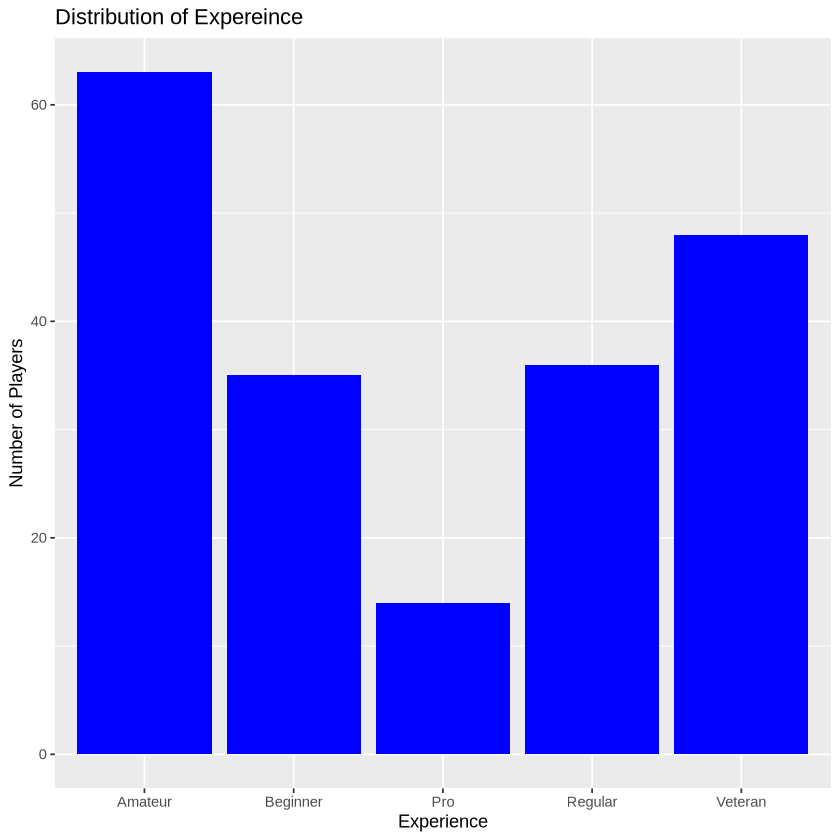

In [5]:
# Distribution of Experience
library(tidyverse)
experience_plot <- players |>
                ggplot(aes(x = experience)) +
                geom_bar(fill = "blue") +
                labs(x = "Experience", y = "Number of Players") +
                ggtitle("Distribution of Experience")
experience_plot

- Experience levels are unevenly distributed
- Some categories have far fewer players such as pro
    - may affect how k-NN measures across the different experience groups

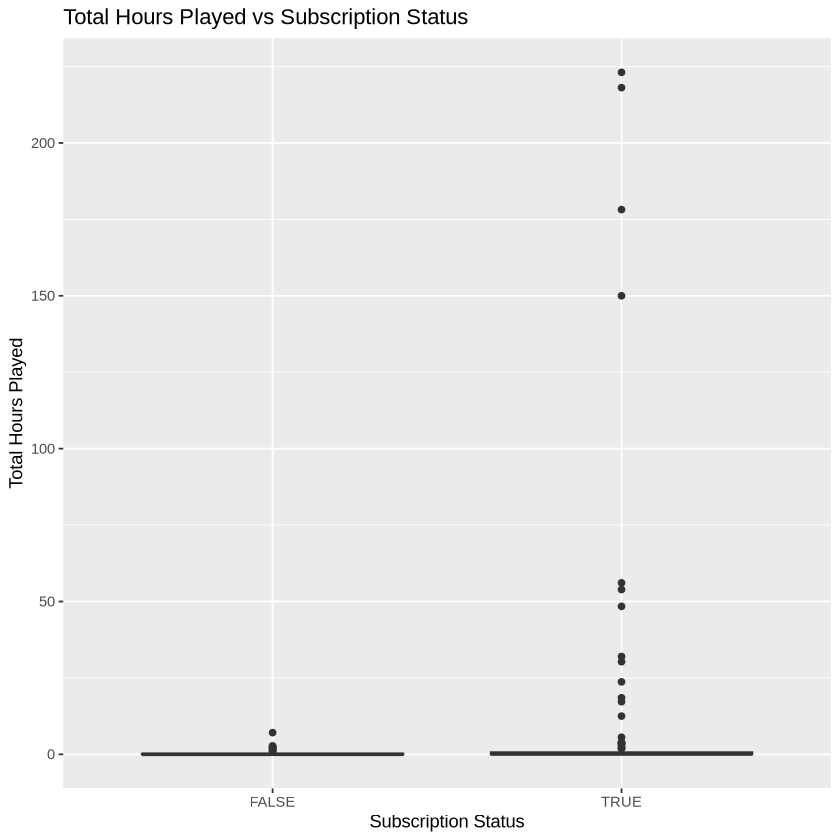

In [6]:
# Relationship between plated_hours and subscription status
library(tidyverse)
played_hours_vs_subscribe_plot <- players |>
                                ggplot(aes(x = subscribe, y = played_hours)) +
                                geom_boxplot(fill = "blue") +
                                labs(x = "Subscription Status", y = "Total Hours Played") +
                                ggtitle("Total Hours Played vs Subscription Status")
played_hours_vs_subscribe_plot

- Players who are subscribed overall show higher playtime values compared to those not subscribed
    - suggests that time spent playing may be related to subscription behaviour
        - supports our choice of predictors

**Methods and Plan**

To answer my question
- plan to use k-nearest neighbors classification
- need to assume that the main idea behind it is that players who are close to each other based on experience and total hours played are likely to behave in similar ways as in if they would be subscribed or not
- However there are a few downsides to k-NN.
    - method depends heavily on how variables are scaled
        - will need to standardize played_hours
    - imbalance in hours played and subscription levels can affect the results of our k-NN classification
    - need to prepare the experience variable for it to be included in the model
- then use cross validation to acquire the best k value
    - the data will first be split into a training set and a test set using prop = 0.75 which will give a 75/25 split
- on the training set,  run 5-fold cross-validation to compare different k values
    - then select the one with the lowest classification error which will be used for the testing data

Before doing classification:
- tidy the data
    - converting experience into a factor
    - standardizing the numeric variables
    - removing missing values such as in Age

**GitHub Repository**
https://github.com/parnishagrewal/dsci_project.git